In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate, optimize
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("full_grouped.csv")
data.rename(columns={'New cases':'New_cases'},inplace=True)
data.rename(columns={'New deaths':'New_deaths'},inplace=True)
data.rename(columns={'New recovered':'New_recovered'},inplace=True)

data_df = pd.DataFrame()
data_df['Confirmé'] = data.loc[data['Country/Region']=='Spain'].New_cases
data_df['Guerri'] = data.loc[data['Country/Region']=='Spain'].Recovered
data_df['mor'] = data.loc[data['Country/Region']=='Spain'].Deaths

data_df = data_df[10:]
data_df['day_count'] = list(range(1,len(data_df)+1))

ydata = [i for i in data_df.Confirmé]
ydata1 = [i for i in data_df.Guerri]
ydata2 = [i for i in data_df.mor]

xdata = data_df.day_count
y = np.array(ydata, dtype=float)
y1 = np.array(ydata1, dtype=float)
y2 = np.array(ydata2, dtype=float)
x = np.array(xdata, dtype=float)

In [3]:
data

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New_cases,New_deaths,New_recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
28606,2020-06-22,West Bank and Gaza,1001,3,442,556,168,0,3,Eastern Mediterranean
28607,2020-06-22,Western Sahara,10,1,8,1,1,0,0,Africa
28608,2020-06-22,Yemen,967,257,350,360,26,1,3,Eastern Mediterranean
28609,2020-06-22,Zambia,1430,11,1194,225,0,0,0,Africa


In [4]:
population = float(46750238)
N = population
inf0 = ydata[0]
sus0 = N - inf0
rec0 = 0.0
mor0 = 0.0

In [5]:
def sir_model(y, x, beta, p):
    S,I,R,D = y
    sus = -beta * S * I/ N
    inf = (beta * S * I/ N) - (p*0.05 * I) - ((1-p)*0.04 * I)
    rec = p*0.05 * I
    mor = (1-p)*0.04 * I
    return sus, inf, rec,mor

def fit_odeint(x, beta, p):
    return integrate.odeint(sir_model, (sus0, inf0, rec0,mor0), x, args=(beta, p))[:,3]

popt, pcov = optimize.curve_fit(fit_odeint, x, y2)
fitted = fit_odeint(xdata, *popt)
print("Optimal parameters: beta =", popt[0], " and p = ", popt[1])

Optimal parameters: beta = 0.39307177757663486  and p =  0.9992330417290564


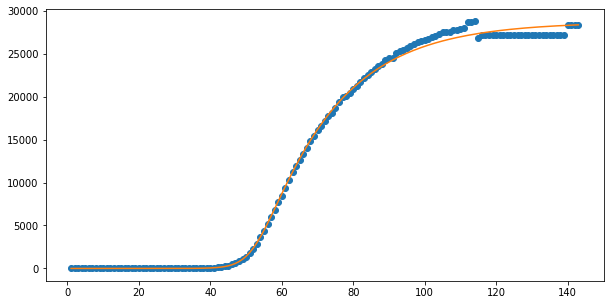

In [6]:
plt.figure(figsize=(10,5))
plt.plot(x, y2, 'o')
plt.plot(x, fitted)

In [11]:
%matplotlib
confirme = data.groupby(['Date']).agg({'Confirmed':['sum']})
guerri = data.groupby(['Date']).agg({'Recovered':['sum']})
mort = data.groupby(['Date']).agg({'Deaths':['sum']})

fig ,(ax1,ax2)= plt.subplots(1,2, figsize=(25,6))
confirme.plot(ax=ax1,color='red')
guerri.plot(ax=ax1,color='green')
mort.plot(ax=ax2,color='black')

Using matplotlib backend: Qt5Agg


In [12]:
df_mada = pd.DataFrame()
df_mada['Date'] = data.loc[data['Country/Region']=='Madagascar'].Date
df_mada['Confirmé'] = data.loc[data['Country/Region']=='Madagascar'].Confirmed
df_mada['Guerrison'] = data.loc[data['Country/Region']=='Madagascar'].Recovered
df_mada['Mortalite'] = data.loc[data['Country/Region']=='Madagascar'].Deaths
df_mada['Nouveau_cas'] = data.loc[data['Country/Region']=='Madagascar'].New_cases
df_mada['cas_Guerri'] = data.loc[data['Country/Region']=='Madagascar'].New_recovered.abs()
df_mada['cas_mor'] = data.loc[data['Country/Region']=='Madagascar'].New_deaths
df_mada.Date = pd.to_datetime(df_mada.Date)
df_mada = df_mada.set_index('Date')
df_mada = df_mada[50:]

plt.figure(figsize=(20,7))
plt.subplot(2,2,1)
plt.bar(df_mada.index,df_mada['Nouveau_cas'],color='red',label='Cas journalier')
plt.legend()

plt.subplot(2,2,2)
plt.plot(df_mada.index,df_mada['Confirmé'],color='red',label='Cas confirmé')
plt.plot(df_mada.index,df_mada['Guerrison'],color='green',label='Guerrison cumulé')
plt.plot(df_mada.index,df_mada['Mortalite'],color='black',label='Mort cumulé')
plt.legend()

plt.subplot(2,2,3)
plt.bar(df_mada.index,df_mada['cas_Guerri'],color='green',label='Cas de guerrison journalier')
plt.legend()

plt.subplot(2,2,4)
plt.bar(df_mada.index,df_mada['cas_mor'],color='black',label='Cas de mortalité journalier')
plt.legend()

In [13]:
df_Italy = pd.DataFrame()
df_Italy['Date'] = data.loc[data['Country/Region']=='Italy'].Date
df_Italy['Confirmé'] = data.loc[data['Country/Region']=='Italy'].Confirmed
df_Italy['Guerrison'] = data.loc[data['Country/Region']=='Italy'].Recovered
df_Italy['Mortalite'] = data.loc[data['Country/Region']=='Italy'].Deaths
df_Italy['Nouveau_cas'] = data.loc[data['Country/Region']=='Italy'].New_cases
df_Italy['cas_Guerri'] = data.loc[data['Country/Region']=='Italy'].New_recovered.abs()
df_Italy['cas_mor'] = data.loc[data['Country/Region']=='Italy'].New_deaths
df_Italy.Date = pd.to_datetime(df_Italy.Date)
df_Italy = df_Italy.set_index('Date')

plt.figure(figsize=(20,7))
plt.subplot(2,2,1)
plt.bar(df_Italy.index,df_Italy['Nouveau_cas'],color='red',label='Cas journalier')
plt.legend()

plt.subplot(2,2,2)
plt.plot(df_Italy.index,df_Italy['Confirmé'],color='red',label='Cas confirmé')
plt.plot(df_Italy.index,df_Italy['Guerrison'],color='green',label='Guerrison cumulé')
plt.plot(df_Italy.index,df_Italy['Mortalite'],color='black',label='Mort cumulé')
plt.legend()

plt.subplot(2,2,3)
plt.bar(df_Italy.index,df_Italy['cas_Guerri'],color='green',label='Cas de guerrison journalier')
plt.legend()

plt.subplot(2,2,4)
plt.bar(df_Italy.index,df_Italy['cas_mor'],color='black',label='Cas de mortalité journalier')
plt.legend()

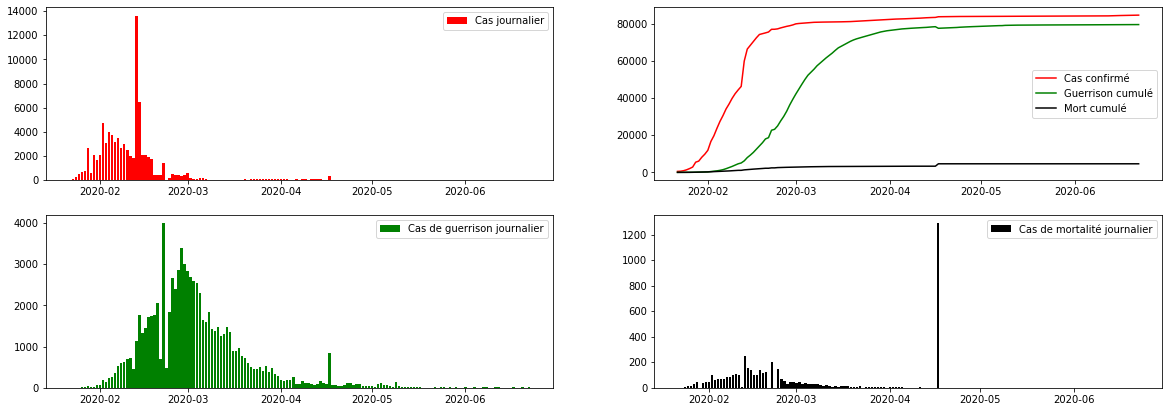

In [10]:
df_China = pd.DataFrame()
df_China['Date'] = data.loc[data['Country/Region']=='China'].Date
df_China['Confirmé'] = data.loc[data['Country/Region']=='China'].Confirmed
df_China['Guerrison'] = data.loc[data['Country/Region']=='China'].Recovered
df_China['Mortalite'] = data.loc[data['Country/Region']=='China'].Deaths
df_China['Nouveau_cas'] = data.loc[data['Country/Region']=='China'].New_cases
df_China['cas_Guerri'] = data.loc[data['Country/Region']=='China'].New_recovered.abs()
df_China['cas_mor'] = data.loc[data['Country/Region']=='China'].New_deaths
df_China.Date = pd.to_datetime(df_China.Date)
df_China = df_China.set_index('Date')

plt.figure(figsize=(20,7))
plt.subplot(2,2,1)
plt.bar(df_China.index,df_China['Nouveau_cas'],color='red',label='Cas journalier')
plt.legend()

plt.subplot(2,2,2)
plt.plot(df_China.index,df_China['Confirmé'],color='red',label='Cas confirmé')
plt.plot(df_China.index,df_China['Guerrison'],color='green',label='Guerrison cumulé')
plt.plot(df_China.index,df_China['Mortalite'],color='black',label='Mort cumulé')
plt.legend()

plt.subplot(2,2,3)
plt.bar(df_China.index,df_China['cas_Guerri'],color='green',label='Cas de guerrison journalier')
plt.legend()

plt.subplot(2,2,4)
plt.bar(df_China.index,df_China['cas_mor'],color='black',label='Cas de mortalité journalier')
plt.legend()